In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.4.1'

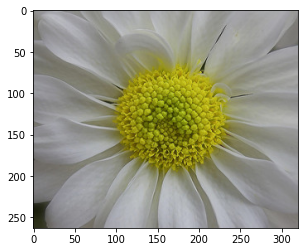

In [3]:
import matplotlib.pyplot as plt
image = keras.preprocessing.image.load_img('../input/flowers-recognition/flowers/daisy/100080576_f52e8ee070_n.jpg')
plt.imshow(image)

In [4]:
class_labels = os.listdir('../input/flowers-recognition/flowers/')
class_labels

['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

In [5]:
train_set = keras.preprocessing.image_dataset_from_directory(
    '../input/flowers-recognition/flowers/',
    validation_split=0.2,
    seed=1227,
    subset='training',
    image_size=(180, 180),
    batch_size=32,
    class_names=class_labels,
)
validation_set = keras.preprocessing.image_dataset_from_directory(
    '../input/flowers-recognition/flowers/',
    validation_split=0.2,
    seed=1227,
    subset='validation',
    image_size=(180, 180),
    batch_size=32,
    class_names=class_labels,
)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


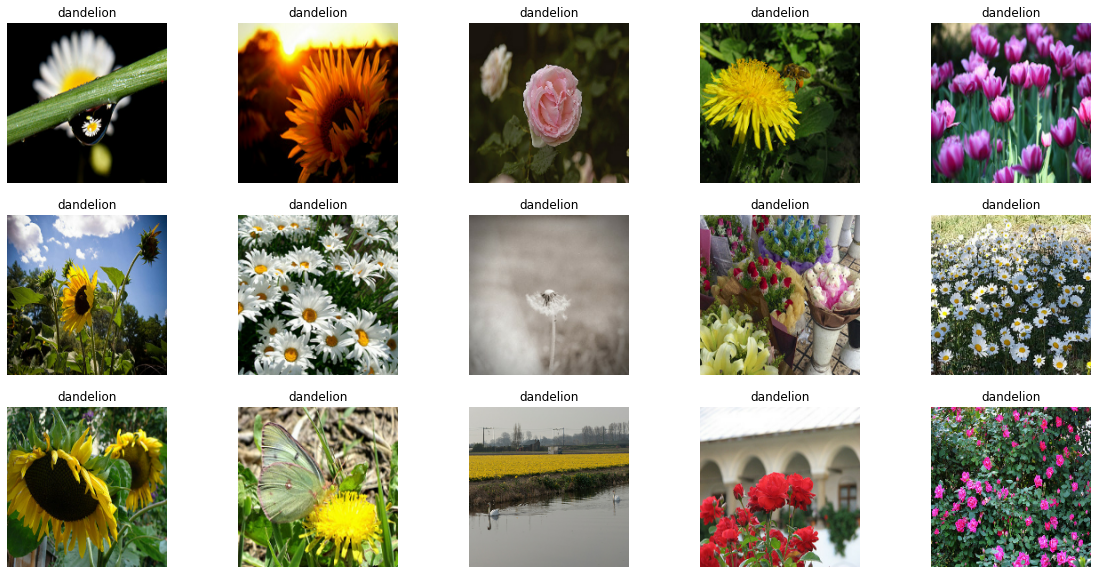

In [6]:
plt.figure(figsize=(20, 10))
for image, label in train_set.take(1):
    for i in range(15):
        plt.subplot(3, 5, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_labels[np.argmax(label[i])])
        plt.axis('off')
    plt.show()

In [7]:
model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=80, activation='relu'),
    keras.layers.Dense(units=len(class_labels), activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 90, 90, 64)        2

In [9]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.fit(train_set, validation_data=validation_set, epochs=20)

Epoch 1/20
108/108 [==============================] - 40s 309ms/step - loss: 5.6049 - accuracy: 0.2974 - val_loss: 7.4596 - val_accuracy: 0.1796
Epoch 2/20
108/108 [==============================] - 11s 101ms/step - loss: 1.3815 - accuracy: 0.4260 - val_loss: 2.2024 - val_accuracy: 0.2491
Epoch 3/20
108/108 [==============================] - 11s 95ms/step - loss: 1.2933 - accuracy: 0.4930 - val_loss: 1.5915 - val_accuracy: 0.3499
Epoch 4/20
108/108 [==============================] - 11s 97ms/step - loss: 1.1585 - accuracy: 0.5432 - val_loss: 1.8499 - val_accuracy: 0.3720
Epoch 5/20
108/108 [==============================] - 11s 94ms/step - loss: 1.0538 - accuracy: 0.5842 - val_loss: 1.7121 - val_accuracy: 0.4658
Epoch 6/20
108/108 [==============================] - 11s 96ms/step - loss: 0.9902 - accuracy: 0.6100 - val_loss: 1.4047 - val_accuracy: 0.5272
Epoch 7/20
108/108 [==============================] - 12s 105ms/step - loss: 0.8897 - accuracy: 0.6544 - val_loss: 1.2500 - val_accura

In [12]:
model.evaluate(validation_set)

27/27 [==============================] - 2s 52ms/step - loss: 2.0472 - accuracy: 0.6095


[2.047194719314575, 0.6095017194747925]

In [13]:
model.save('flower_model')